In [15]:
using Random, Distributions, LinearAlgebra, Plots, LaTeXStrings
Random.seed!(123);

In [16]:
μ = 0;σ = 1;
Nₛ =  Normal(μ,σ);
μₜ = exp(Nₛ.μ+1/2*Nₛ.σ^2);
σₜ = exp(2*Nₛ.μ+Nₛ.σ^2)*(exp(Nₛ.σ^2)-1);

In [17]:
ns = 10:10:10000;
antithetic = zeros(length(ns));
accept_reject = zeros(length(ns));

In [18]:
for i in 1:length(ns)
    # Simulate E[X], where X~exp(N(0,1)) with accept reject monte carlo
    ar_sample = rand(Nₛ,ns[i]);
    accept_reject[i] = mean(exp.(ar_sample));

    # Simulate E[X], where X~exp(N(0,1)) with antithetic accept reject monte carlo
    at_sample = rand(Nₛ,Int(ns[i]/2));
    at_sample = [at_sample;-at_sample];
    antithetic[i] = mean(exp.(at_sample));
end

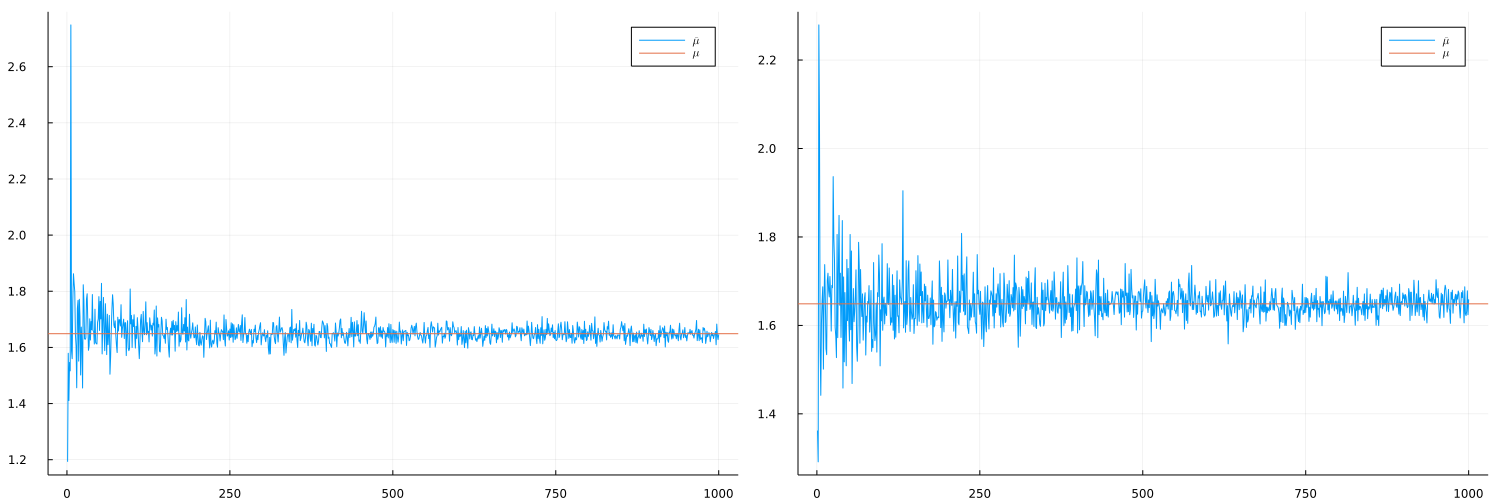

In [19]:
p1 = plot(
    antithetic,
    size=(1500,500),
    label=L"\bar{\mu}"
)
hline!([μₜ], label=L"\mu")

p2 = plot(
    accept_reject,
    size=(1500,500),
    labels=L"\bar{\mu}"
)
hline!([μₜ], label=L"\mu")

plot(p1,p2)